# Equivalent layer technique for estimating total magnetization direction using 

#### Importing libraries

In [1]:
% matplotlib inline 

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import datetime
import timeit
import string as st
from scipy.optimize import nnls
from fatiando.gridder import regular
from fatiando.utils import ang2vec, vec2ang
from fatiando.mesher import Sphere, PointGrid,Prism
from fatiando.gravmag import sphere,prism
from fatiando.constants import CM, T2NT, G, SI2MGAL

/home/andrelreis/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
notebook_name = 'airborne_EQL_magdirection_RM_calculation.ipynb'

#### Importing auxiliary functions

In [4]:
dir_modules = '../../../mypackage'
sys.path.append(dir_modules)

In [5]:
import auxiliary_functions as fc

#### Loading properties of the model

In [6]:
with open('data/model_prism.pickle') as f:
        model_prism = pickle.load(f)

#### Loading properties grid

In [7]:
with open('data/airborne_survey.pickle') as f:
        airborne = pickle.load(f)

#### Loading data

In [8]:
with open('data/data_set.pickle') as f:
        data = pickle.load(f)

#### Open a dictionary

In [9]:
result_RM_airb = dict()

### Saving files

In [10]:
saved_files = []

## Observation area

In [11]:
print 'Area limits: \n x_max = %.1f m \n x_min = %.1f m \n y_max = %.1f m \n y_min = %.1f m' % (airborne['area'][1], 
                                                                                                airborne['area'][0],
                                                                                                airborne['area'][3],
                                                                                                airborne['area'][2])

Area limits: 
 x_max = 6000.0 m 
 x_min = -6000.0 m 
 y_max = 6000.0 m 
 y_min = -6000.0 m


### airborne survey information

In [12]:
print 'Shape : (%.0f,%.0f)'% airborne['shape'] 
print 'Number of data: %.1f' % airborne['N']
print 'dx: %.1f m' % airborne['dx']
print 'dy: %.1f m ' % airborne['dy']

Shape : (35,25)
Number of data: 875.0
dx: 352.9 m
dy: 500.0 m 


## Properties of the model

### Main field

In [13]:
inc_gf,dec_gf = model_prism['main_field']

In [14]:
print'Main field inclination: %.1f degree' % inc_gf
print'Main field declination: %.1f degree' % dec_gf

Main field inclination: 30.0 degree
Main field declination: 40.0 degree


### Magnetization direction

In [15]:
print 'Intensity: %.1f A/m' % model_prism['m_R']
print 'Inclination: %.1f degree' % model_prism['inc_R']
print 'Declination: %.1f degree' % model_prism['dec_R']

Intensity: 5.0 A/m
Inclination: 50.0 degree
Declination: 15.0 degree


In [16]:
inc_R,dec_R = model_prism['inc_R'],model_prism['dec_R']

## Generating the layer with my function 

In [17]:
h = 1050.

#### Generating a layer

In [18]:
shape_layer = (airborne['shape'][0],airborne['shape'][1])

In [19]:
xs,ys,zs = regular(airborne['area'],shape_layer,h)

### Levenberg-Marquardt with NNLS for positive magnetic moments

In [20]:
i_pos = 1500

In [21]:
it_max = 30

In [22]:
it_marq = 15

In [23]:
lamb = 10.
dlamb = 100.

In [24]:
eps_e = 1e-4
eps_i = 1e-4

In [25]:
mu_list = [1e3,1e4,1e5,1e6,1e7]

In [26]:
mu_norm = []
norm_r = []
norm_m = []
m_est = []
incl_est = []
decl_est = []
phi_list = []
for i in mu_list:
    m_LM,inc_est,dec_est,phi,imax,pest,incs,decs = fc.levenberg_marquardt_NNLS(
        data['tfa_obs_prism_RM_airb'],airborne['x'],airborne['y'],
        airborne['z'],xs,ys,zs,inc_gf,dec_gf,-10.,-10.,lamb,dlamb,i_pos,it_max,
        it_marq,eps_e,eps_i,i)
    G = fc.sensitivity_mag(airborne['x'],airborne['y'],airborne['z'],
                       xs,ys,zs,inc_gf,dec_gf,inc_est,dec_est)
    tfpred = np.dot(G,m_LM)
    r = data['tfa_obs_prism_RM_airb'] - tfpred 
    
    norm_r.append(np.sqrt(np.sum(r*r)))
    norm_m.append(np.sqrt(np.sum(m_LM*m_LM)))
    m_est.append(m_LM)
    incl_est.append(inc_est)
    decl_est.append(dec_est)
    phi_list.append(phi)

i = 0
0.919048007047 -4.96419886231
i = 1
8.45587854782 -2.91285943472
i = 2
13.0416249038 -1.9145553528
i = 3
16.1617955396 -1.24497244969
i = 4
18.4894512844 -0.719292973412
i = 5
20.3237161607 -0.269484237078
i = 6
21.8411100287 0.163177304153
i = 7
23.1285056103 0.582841675722
i = 8
24.239817252 0.989715464783
i = 9
25.210042247 1.38393085983
i = 10
26.0677736395 1.76167207441
i = 11
26.8343245197 2.12196480138
i = 12
27.5256576552 2.46293075273
i = 13
28.1547469622 2.78100174252
i = 14
28.731493782 3.07602606661
i = 15
29.2634677329 3.35128946975
i = 16
29.7566678524 3.60920408132
i = 17
30.2158009948 3.85129658181
i = 18
30.6445492309 4.07735484544
i = 19
31.0461203546 4.28675988364
i = 20
31.4231652508 4.47927296259
i = 21
31.7783401624 4.65740097084
i = 22
32.1148194416 4.82653206705
i = 23
32.4341507911 4.98672814992
i = 24
32.7378254597 5.13848878837
i = 25
33.0276893864 5.28299746113
i = 26
33.3048403308 5.42043303022
i = 27
33.5701361532 5.55073984199
i = 28
33.8244642468 5

46.9909676152 10.6240925235
i = 233
47.0114580414 10.6328189323
i = 234
47.0318011829 10.6415010033
i = 235
47.0519984232 10.6501391685
i = 236
47.0720511288 10.6587338537
i = 237
47.0919606494 10.6672854781
i = 238
47.111728318 10.6757944549
i = 239
47.1313554514 10.684261191
i = 240
47.15084335 10.6926860872
i = 241
47.1701932988 10.7010695387
i = 242
47.1894065668 10.7094119347
i = 243
47.1894065668 10.7094119347
i = 0
0.919081455548 -4.96406736743
i = 1
8.45592046452 -2.91269577529
i = 2
13.0416545959 -1.91433827717
i = 3
16.1618225075 -1.24474899475
i = 4
18.4894760103 -0.719084040316
i = 5
20.3237558751 -0.269261842802
i = 6
21.8411620962 0.163414070946
i = 7
23.1285661869 0.583090224992
i = 8
24.2398934758 0.989959420669
i = 9
25.2101473347 1.38419274631
i = 10
26.0678981999 1.76194287991
i = 11
26.8344561303 2.12223541917
i = 12
27.5257950238 2.46319992931
i = 13
28.1548961873 2.78126332497
i = 14
28.7316483676 3.07628621105
i = 15
29.2636249313 3.35154465196
i = 16
29.75683392

46.7343978145 10.5162442454
i = 221
46.7567011399 10.525513065
i = 222
46.7788482559 10.5347353904
i = 223
46.8008408202 10.5439115265
i = 224
46.822680438 10.5530417983
i = 225
46.8443685717 10.5621266605
i = 226
46.8659065782 10.5711666498
i = 227
46.8872954101 10.5801626643
i = 228
46.9085364512 10.5891151309
i = 229
46.9296304564 10.5980237845
i = 230
46.9505738091 10.6068820995
i = 231
46.9713657055 10.6156943218
i = 232
46.9920073819 10.6244612423
i = 233
47.0125002585 10.633183307
i = 234
47.0328457378 10.6418609553
i = 235
47.0530452048 10.6504946199
i = 236
47.0731000275 10.6590847271
i = 237
47.093011557 10.6676316969
i = 238
47.1127811276 10.6761359428
i = 239
47.1324100576 10.6845978725
i = 240
47.1518996489 10.6930178875
i = 241
47.1712511876 10.7013963834
i = 242
47.1904659442 10.70973375
i = 243
47.1904659442 10.70973375
i = 0
0.922285520018 -4.95141062384
i = 1
8.4600096385 -2.89688372387
i = 2
13.0444995487 -1.89325709274
i = 3
16.1652406099 -1.2228936407
i = 4
18.4921

46.5124907273 10.3835492142
i = 209
46.5369739637 10.3932887233
i = 210
46.5612797117 10.4029783933
i = 211
46.5854097099 10.4126187431
i = 212
46.6093656741 10.4222102838
i = 213
46.6331492977 10.4317535181
i = 214
46.6567622522 10.441248941
i = 215
46.6802061874 10.4506970393
i = 216
46.7034827318 10.4600982925
i = 217
46.7265934931 10.4694531723
i = 218
46.7495400582 10.4787621432
i = 219
46.7723239938 10.4880256627
i = 220
46.7949468468 10.4972441851
i = 221
46.8174101444 10.5064181538
i = 222
46.8397153943 10.515548005
i = 223
46.8618638497 10.5246336578
i = 224
46.8838568288 10.5336753543
i = 225
46.9056945098 10.5426726307
i = 226
46.927374344 10.5516203034
i = 227
46.9488963797 10.5605168219
i = 228
46.9702621331 10.5693627016
i = 229
46.99147313 10.5781584258
i = 230
47.0125311259 10.5869042576
i = 231
47.0334375731 10.5956006922
i = 232
47.05419396 10.6042482259
i = 233
47.0748017022 10.6128473397
i = 234
47.095262196 10.6213985072
i = 235
47.1155763644 10.6299015571
i = 236


50.3557923099 11.1209277755
i = 195
50.3968821679 11.1317292899
i = 196
50.4376616599 11.1425774114
i = 197
50.4781338457 11.1534706236
i = 198
50.5183019495 11.1644076
i = 199
50.5581698931 11.1753869721
i = 200
50.5977410626 11.1864073059
i = 201
50.6370183206 11.1974671256
i = 202
50.6760044922 11.2085649685
i = 203
50.7147023876 11.2196991904
i = 204
50.7531141619 11.23086704
i = 205
50.7912393788 11.2420585614
i = 206
50.8290811722 11.2532704897
i = 207
50.866642172 11.2644998227
i = 208
50.9039250554 11.2757462912
i = 209
50.9409325652 11.2870085945
i = 210
50.9776673314 11.2982856518
i = 211
51.0141320819 11.3095755131
i = 212
51.0503296901 11.3208751934
i = 213
51.086262639 11.3321838291
i = 214
51.1219333804 11.3435005613
i = 215
51.1573440447 11.3548239076
i = 216
51.1924969833 11.3661529361
i = 217
51.2273943446 11.3774856948
i = 218
51.2620387879 11.3888206116
i = 219
51.2964323019 11.4001541828
i = 220
51.3305704066 11.41147638
i = 221
51.3644547915 11.4227842831
i = 222
5

## L-curve visualization

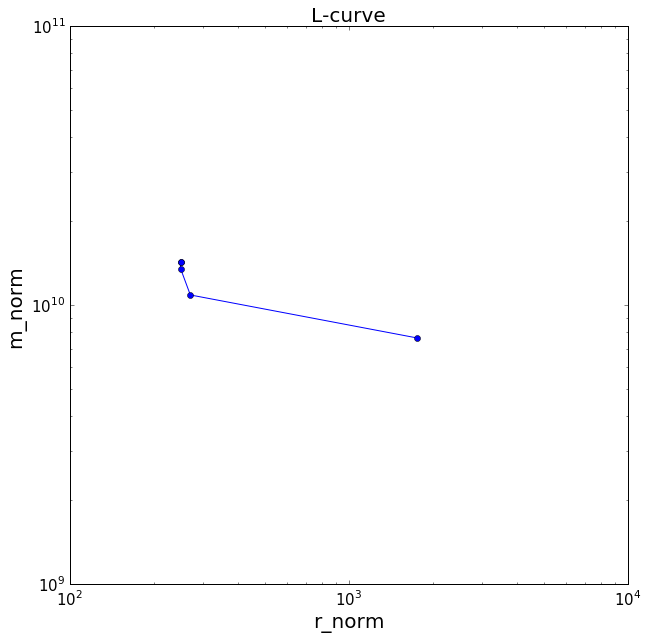

In [27]:
title_font = 20
bottom_font = 18
saturation_factor = 1.
plt.close('all')
plt.figure(figsize=(9,9), tight_layout=True)

plt.figure(figsize=(10, 10))
plt.loglog(norm_r,norm_m, 'b-')
plt.loglog(norm_r,norm_m, 'bo')
plt.title('L-curve', fontsize=title_font)
plt.xlabel('r_norm', fontsize = title_font)
plt.ylabel('m_norm', fontsize = title_font)
plt.tick_params(axis='both', which='major', labelsize=15)

file_name = 'figs/airborne/Lcurve_RM'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.savefig(file_name+'.eps',dpi=300)
saved_files.append(file_name+'.eps')


plt.show()

### Results

In [28]:
result_RM_airb['magnetic_moment'] = m_est
result_RM_airb['inc_est'] = incl_est
result_RM_airb['dec_est'] = decl_est
result_RM_airb['layer_depth'] = h
result_RM_airb['reg_parameter'] = mu_list
result_RM_airb['phi'] = phi_list

### Generating .pickle file

In [29]:
now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
result_RM_airb['metadata'] = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)

In [30]:
file_name = 'data/result_RM_airb.pickle'
with open(file_name, 'w') as f:
    pickle.dump(result_RM_airb, f)
    
saved_files.append(file_name)

### Saved files

In [31]:
with open('reports/report_%s.md' % notebook_name[:st.index(notebook_name, '.')], 'w') as q:
    q.write('# Saved files \n')
    now = datetime.datetime.utcnow().strftime('%d %B %Y %H:%M:%S UTC')
    header = 'Generated by {name} on {date}'.format(date=now, name=notebook_name)
    q.write('\n\n'+header+'\n\n')
    for i, sf in enumerate(saved_files):
        print '%d  %s' % (i+1,sf)
        q.write('*  `%s` \n' % (sf))

1  figs/airborne/Lcurve_RM.png
2  figs/airborne/Lcurve_RM.eps
3  data/result_RM_airb.pickle
